# 1. Install and Import Dependencies

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

D:\workspace_Data_Science\env_ghosh\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# 2. Instantiate Model

In [2]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# 3. Encode and Calculate Sentiment

In [3]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')

In [391]:
result = model(tokens)

In [5]:
result.logits

tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward>)

In [6]:
int(torch.argmax(result.logits))+1

4

# 4. Collect Reviews

In [7]:
r = requests.get('https://www.yelp.com/biz/social-brew-cafe-pyrmont')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [8]:
reviews[0]

'Great food amazing coffee and tea. Short walk from the harbor. Staff was very friendly'

In [9]:
print(type(reviews[0]))

<class 'str'>


# 5. Load Reviews into DataFrame and Score

In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [12]:
df['review'].iloc[0]

'Great food amazing coffee and tea. Short walk from the harbor. Staff was very friendly'

In [289]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    SS = int(torch.argmax(result.logits))+1
    print("Sentiment Score",SS)
    return int(torch.argmax(result.logits))+1

In [14]:
sentiment_score(df['review'].iloc[1])

3

In [15]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512])) #this BART can take max 512 token at once (if more take avg)

In [16]:
df

review  sentiment
0   Great food amazing coffee and tea. Short walk ...          5
1   It was ok. Had coffee with my friends. I'm new...          3
2   Great staff and food.  Must try is the pan fri...          5
3   Ricotta hot cakes! These were so yummy. I ate ...          5
4   I came to Social brew cafe for brunch while ex...          5
5   It was ok. The coffee wasn't the best but it w...          3
6   We came for brunch twice in our week-long visi...          4
7   I went here a little while ago- a beautiful mo...          2
8   Ron & Jo are on the go down under and Wow!  We...          5
9   Great coffee and vibe. That's all  you need. C...          5
10  Great coffee and vibe. That's all  you need. C...          4

In [17]:
df['review'].iloc[3]

"Ricotta hot cakes! These were so yummy. I ate them pretty fast and didn't share with anyone because they were that good ;). I ordered a green smoothie to balance it all out. Smoothie was a nice way to end my brekkie at this restaurant. Others with me ordered the salmon Benedict and the smoked salmon flatbread. They were all delicious and all plates were empty. Cheers!"

# 6. Load profile data from linked in

**Data Source**: [MBTI](https://www.kaggle.com/datasets/datasnaek/mbti-type?resource=download)

In [18]:
# Import the data
linkedinPROFILEdata = pd.read_csv("(MBTI) Myers-Briggs Personality Type Dataset.csv")
linkedinPROFILEdata

type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]

In [19]:
linkedinPROFILEdata['posts']

0       'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1       'I'm finding the lack of me in these posts ver...
2       'Good one  _____   https://www.youtube.com/wat...
3       'Dear INTP,   I enjoyed our conversation the o...
4       'You're fired.|||That's another silly misconce...
                              ...                        
8670    'https://www.youtube.com/watch?v=t8edHB_h908||...
8671    'So...if this thread already exists someplace ...
8672    'So many questions when i do these things.  I ...
8673    'I am very conflicted right now when it comes ...
8674    'It has been too long since I have been on per...
Name: posts, Length: 8675, dtype: object

In [134]:
ZeroUSER = linkedinPROFILEdata['posts'].iloc[0]
FirstUSER = linkedinPROFILEdata['posts'].iloc[1]

### 4652

In [135]:
len(ZeroUSER), len(FirstUSER)

(4652, 7053)

In [136]:
ZeroUSER = ZeroUSER.split("|||")
len(ZeroUSER)

50

In [29]:
ZeroUSER

["'http://www.youtube.com/watch?v=qsXHcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
 'What has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
 'May the PerC Experience immerse you.',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
 "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

In [34]:
listToStr = ' '.join([str(elem) for elem in ZeroUSER])
listToStr

"'http://www.youtube.com/watch?v=qsXHcwe3krw http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks What has been the most life-changing experience in your life? http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206 Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as... 84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ... Welcome and stu

In [31]:
len(listToStr)

4554

In [51]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = listToStr
doc = nlp(text)

for token in doc:
    if token.like_url:
        print(token)

numemails = " "
   
for token in doc:
    if token.like_url:
        numemails.join(token.text)
    

http://www.youtube.com/watch?v=qsXHcwe3krw
http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg
https://www.youtube.com/watch?v=iz7lE1g4XM4
https://www.youtube.com/watch?v=uCdfze1etec
http://www.youtube.com/watch?v=vXZeYwwRDw8
http://www.youtube.com/watch?v=u8ejam5DP3E
http://vimeo.com/22842206
http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg
http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg
http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg
https://www.youtube.com/watch?v=QyPqT8umzmY
http://www.youtube.com/watch?v=gDhy7rdfm14
http://www.youtube.com/watch?v=msqXffgh7b8
http://www.youtube.com/watch?v=Mw7eoU3BMbE
http://www.youtube.com/watch?v=4V2uYORhQOk
http://www.youtube.com/watch?v=SlVmgFQQ0TI
http://www.youtube.com/watch?v=IRcrv41hgz4
http://www.youtube.com/watch?v=ZRCEq_JFeFM
http://discovermagazine.com/2012/jul-aug/20-things-you-didnt-know-about-deserts/desert.jpg
http:/

In [124]:
def getURLs(text):
    doc = nlp(text)

    for token in doc:
        if token.like_url:
            print(token)

In [125]:
def removeURLs(text):
    text_sp = text.split()
    ans = ' '.join([i for i in text_sp if 'ht' not in i])
    return(ans)

In [126]:
def getEmails(text):
    doc = nlp(text)

    for token in doc:
        if token.like_email:
            print(token)


### 4554

In [42]:
len(listToStr)

4554

### 3258

In [66]:
len(removeURLs(listToStr))


3258

In [67]:
text_stopword = removeURLs(listToStr)
text_stopword

"enfp and intj moments sportscenter not top ten plays pranks What has been the most life-changing experience in your life? On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as... 84389 84390 ... Welcome and stuff. Game. Set. Match. Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative... Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when left by... All things in moderation. Sims is indeed a video

### Combining Stopwords from NLTK and Spacy | set(179, 326) = 382

In [79]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
stopwords_SPACY = en.Defaults.stop_words

print(len(stopwords_SPACY))
print(stopwords_SPACY)

326
{'anyway', 'namely', 'on', 'noone', 'i', 'perhaps', 'must', 'five', 'can', 'throughout', 'is', 'whereby', 'further', 'do', 'alone', 'whereupon', 'it', 'another', 'these', 'therein', 'other', 'us', 'herself', 'seeming', 'yet', 'her', 'always', 'rather', 'though', 'really', 'give', 'anywhere', 'should', 'indeed', 'hereupon', 'those', 'thus', 'hereafter', 'even', 'meanwhile', '‘d', 'part', 'may', 'because', 'eleven', 'across', 'sometime', 'them', 'somewhere', 'get', 'empty', 'full', 'quite', 'anything', 'doing', 'own', 'nine', 'everyone', 'hundred', 'otherwise', 'becoming', 'over', 'below', 'just', 'he', 'mine', 'could', 'everywhere', 'in', "n't", 'hers', 'whereafter', 'whether', 'since', 'keep', 'name', 'does', "'ll", 'whoever', 'have', 'they', 'to', 'not', 'and', 'much', 'others', 'something', 'still', 'nobody', 'becomes', 'whence', 'go', 'ours', 'from', 'except', 'once', 'who', 'become', 'four', 'former', 'but', 'than', 'thence', 'most', 'via', 'of', 'forty', 'along', 'beforehand',

In [83]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [61]:
#nltk.download() # If you running for the first time , install all

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [87]:
nltk.download('stopwords')
stopwords_NLTK = stopwords.words("english")
print(stopwords_NLTK)
print(len(stopwords_NLTK))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
print(type(stopwords_NLTK)), print(type(list(stopwords_SPACY)))

<class 'list'>
<class 'list'>


(None, None)

In [91]:
import spacy

nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words |= set(stopwords_NLTK)

In [92]:
print(len(stopwords_SPACY))
print(stopwords_SPACY)

382
{'anyway', 'namely', 'on', 'noone', 'i', 'perhaps', 'must', 'five', 'can', 'throughout', 'is', 'whereby', 'further', 'do', 'alone', 'whereupon', 'it', 'another', 'these', 'therein', 'other', 'us', 'herself', 'seeming', 'yet', 'her', 'always', 'rather', 'though', 'really', 'give', "should've", 'anywhere', 'should', 'indeed', 'hereupon', 'those', 'didn', 'thus', 'hereafter', 'even', 'meanwhile', '‘d', 'part', 'may', 'because', 'eleven', 'across', 'sometime', 's', 'them', 'somewhere', 'get', 'empty', 'full', 'quite', 'anything', 'doing', 'own', 'nine', 'everyone', 'hundred', 'otherwise', 'becoming', 'over', 'mightn', 'below', "you'd", 'just', 'he', 'having', 'mine', 'could', "needn't", 'everywhere', 'shouldn', 'in', "n't", "mustn't", 'hers', 'isn', 'whereafter', 'whether', 'since', "aren't", 'keep', 'o', 'name', 'does', "wouldn't", "'ll", 'whoever', 'have', 'they', 'to', 'not', 'and', 'much', 'others', 'something', 'still', 'nobody', 'becomes', 'whence', 'go', 'ours', 'from', 'except'

In [95]:
stopwords_NLTK.extend(stopwords_SPACY)
print(len(set(stopwords_NLTK)))

382


### Removing Stopwords

In [99]:
text_stopword, len(text_stopword)

("enfp and intj moments sportscenter not top ten plays pranks What has been the most life-changing experience in your life? On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as... 84389 84390 ... Welcome and stuff. Game. Set. Match. Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative... Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when left by... All things in moderation. Sims is indeed a vide

In [108]:
# extending stopwords based on the particluar text
stopwords_NLTK.extend("...")
print(len(stopwords_NLTK))
stopwords_NLTK = set(stopwords_NLTK)

1334


In [109]:
print(len(stopwords_NLTK))

383


### 2185 (Clean Text)

In [110]:
cleanTEXT = " ".join([word for word in str(text_stopword).split() if word not in stopwords_NLTK])
cleanTEXT

"enfp intj moments sportscenter plays pranks What life-changing experience life? On repeat today. May PerC Experience immerse you. The thing INFJ friend posted facebook committing suicide day. Rest peace~ Hello ENFJ7. Sorry hear distress. It's natural relationship perfection time moment existence. Try figure hard times times growth, as... 84389 84390 ... Welcome stuff. Game. Set. Match. Prozac, wellbrutin, thirty minutes moving legs (and I mean moving sitting desk chair), weed moderation (maybe try edibles healthier alternative... Basically come items determined type (or whichever types want do) likely use, given types' cognitive functions whatnot, left by... All things moderation. Sims video game, good that. Note: good somewhat subjective I completely promoting death given Sim... Dear ENFP: What favorite video games growing now, current favorite video games? :cool: It appears late. :sad: There's everyone. Wait... I confidence good thing. I cherish time solitude b/c revel inner world t

In [111]:
len(cleanTEXT)

2185

## Visualization

**References:**
1. [Set of Colors](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
2. [Twitter sentiment analysis](https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-2-333514854913)

In [112]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt

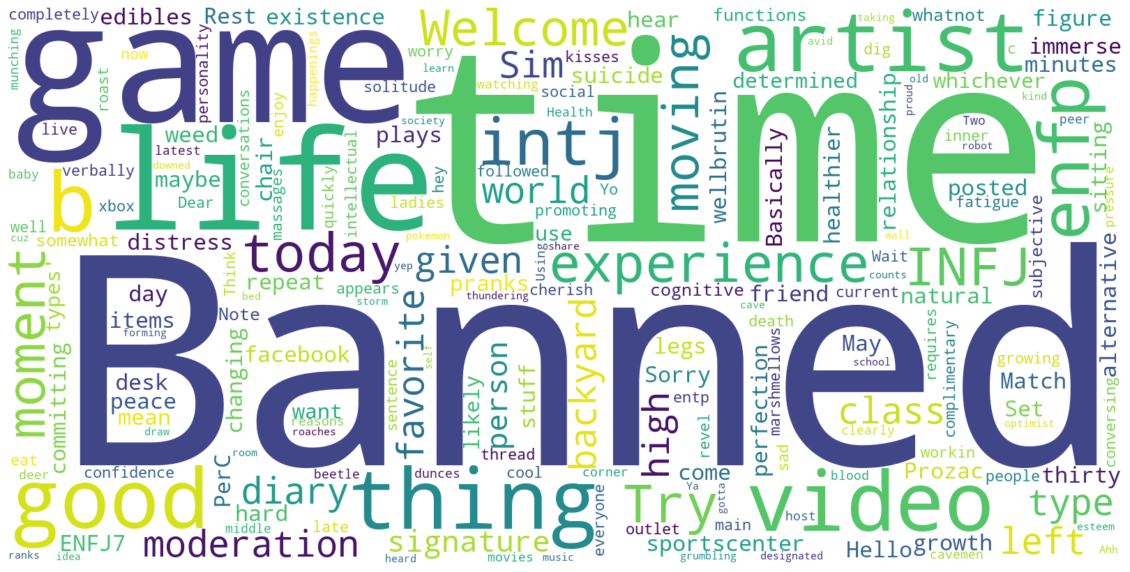

In [117]:
wordcloud_cleanTEXT = WordCloud(width=1600, height=800, background_color="white").generate(cleanTEXT)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_cleanTEXT, interpolation='bilinear')
plt.axis("off")
plt.show()

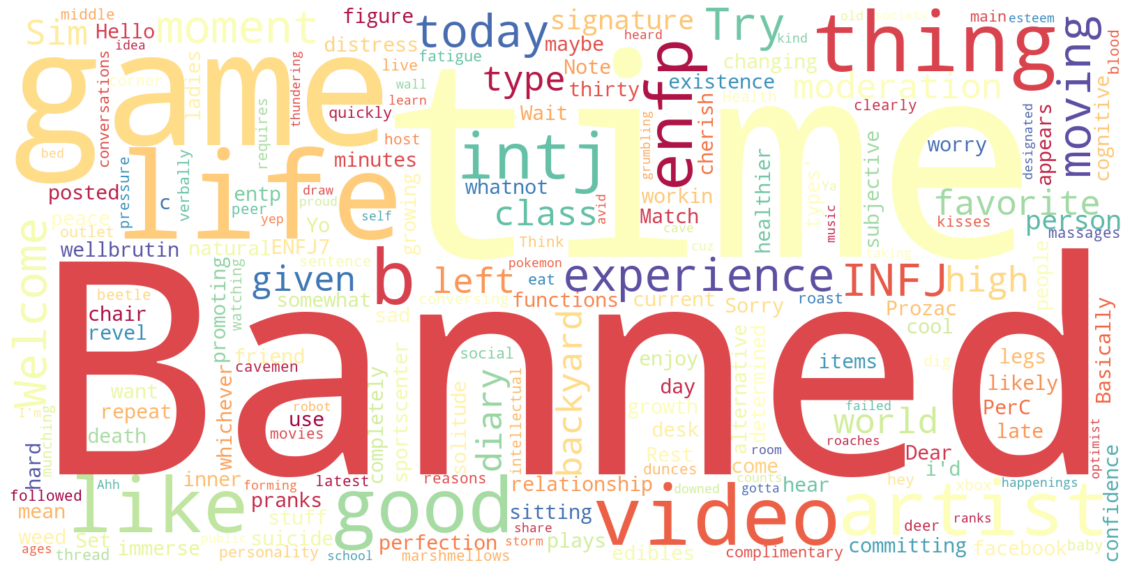

In [301]:
stopwords = set(stopwords_NLTK)
stopwords.update(["I","... "])

wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", colormap = "Spectral", width=1600, height=800).generate(cleanTEXT)

# Lines 4 to 7
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

In [142]:
def getWordcloud(cleanTEXT, newSTOPWORDS):
    stopwords = set(stopwords_NLTK)
    stopwords.update(newSTOPWORDS)

    wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations=False width=1600, height=800).generate(cleanTEXT)

    # Lines 4 to 7
    plt.figure(figsize = (20,20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# 7. Final Pipeline

### 7.1 Essential Libraries

In [445]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import nltk
#nltk.download('stopwords') ## run if using nltk for the first time ever
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# import matplotlib.cm as cm
import plotly.graph_objects as go


### 7.2 User Defined Functions

In [446]:
def getURLs(text):
    doc = nlp(text)
    count = 0
    print("***** URLs******")
    for token in doc:
        if token.like_url:
            count=count+1
            print(token)
    print("number of URLS:",count,"\n")

In [447]:
def getEmails(text):
    doc = nlp(text)
    countEmail = 0
    print("***** Emails******")
    for token in doc:
        if token.like_email:
            countEmail = countEmail + 1
            print(token)
    print("number of Emails:",countEmail,"\n")

In [448]:
def removeEmails(text):
    text_sp = text.split()
    ans = ' '.join([i for i in text_sp if '@' not in i])
    return(ans)

In [449]:
def removeURLs(text):
    text_sp = text.split()
    ans = ' '.join([i for i in text_sp if 'ht' not in i])
    return(ans)

### 7.3 Prepareing StopWords

In [450]:
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
stopwords_SPACY = en.Defaults.stop_words

print("SPACY Stopwords # = ",len(stopwords_SPACY))

stopwords_NLTK = stopwords.words("english")
print("NLTK Stopwords # = ",stopwords_NLTK)

print(len(stopwords_NLTK))

SPACY Stopwords # =  382
NLTK Stopwords # =  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 

In [452]:
# Combining spacy and nltk stopwords
stopwords_NLTK.extend(stopwords_SPACY)
print(len(stopwords_NLTK))

stopwords_NLTK.extend("...")
print(len(stopwords_NLTK))

stopwords_NLTK = set(stopwords_NLTK)
print("Combined STOPWORDS = ",len(stopwords_NLTK))

561
564
Combined STOPWORDS =  383


###  7.4 Sentiment Calculation using BART

**Emoji** https://unicode.org/emoji/charts/full-emoji-list.html#1f923

**Unicode**: https://www.geeksforgeeks.org/python-program-to-print-emojis/

In [453]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

#### 7.4.1 Instatiate the pre-trained BART model

source: [bert-base-multilingual-uncased-sentiment](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment?text=I+like+you.+I+love+you)

In [454]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [585]:
    emojiDICT = {1:"\U0001F621",
         2:"\U0001F641",
         3:"\U0001F610",
         4:"\U0001F642",
         5:"\U0001F47D"}
    
print("Bad",emojiDICT[1],"Poor", emojiDICT[2], "OkOk", emojiDICT[3], "Good", emojiDICT[4], "Excellent", emojiDICT[5])

Bad 😡 Poor 🙁 OkOk 😐 Good 🙂 Excellent 👽


In [584]:
def sentiment_score(review):
    emojiDICT = {1:"\U0001F621",
         2:"\U0001F641",
         3:"\U0001F610",
         4:"\U0001F642",
         5:"\U0001F47D"}
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    SS = int(torch.argmax(result.logits))+1
    print("Sentiment Score",SS,emojiDICT[SS])
    #gaugemeter(SS)
    return SS # input SS or emojiDICT[SS] to get number or emoji

#### Sentence 2 Sentiment Example

In [586]:
tokens = tokenizer.encode('hate hate hate', return_tensors='pt')
result = model(tokens)
result.logits
SS = int(torch.argmax(result.logits))+1
print("Sentiment",emojiDICT[SS],SS)

Sentiment 😡 1


#### 7.4.2 Visualization Tools

In [458]:
def getWordcloud(cleanTEXT, newSTOPWORDS):
    stopwords = set(stopwords_NLTK)
    stopwords.update(newSTOPWORDS)

    wordcloud = WordCloud(stopwords=stopwords, background_color="white", colormap='RdYlGn', width=1600, height=800).generate(cleanTEXT)

    # Lines 4 to 7
    plt.figure(figsize = (20,20))
    plt.imshow(wordcloud, interpolation='bilinear')
    #plt.colorbar()
    plt.axis("off")
    plt.title("WordCLOUD", fontsize=20)
    plt.show()

In [459]:
def gaugemeter(score):
    fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = score,
    mode = "gauge+number",
    title = {'text': "Sentiment-o-Meter"},
    gauge = {'axis': {'range': [0, 5]},
             'steps' : [
                 {'range': [0, 1], 'color': "red"},
                 {'range': [1, 2], 'color': "orange"},
                 {'range': [2, 3], 'color': "yellow"},
                 {'range': [3, 4], 'color': "limegreen"},
                 {'range': [4, 5], 'color': "green"}]}))

    fig.show()

### Master F(x)

In [460]:
def extractINFO(text):
    print("Length of RAW Text =",len(text))

    # delimeter eleminated

    text = text.split("|||")

    # list to str
    text = ' '.join([str(elem) for elem in text])

    # get EMails
    getEmails(text)

    # get URLs
    getURLs(text)

    # remove URLS
    text_links_null = removeURLs(text)
    
    # remove Emails
    text_links_null = removeEmails(text)

    # Cleaning the text
    Special_stopwords_01 = ["I","... ","I'm","WWW","www","https","http","youtube"]
    stopwords = set(stopwords_NLTK)
    stopwords.update(Special_stopwords_01)
    
    text_clean = " ".join([word for word in str(text_links_null).split() if word not in stopwords])
    print("Length of Clean Text =",len(text_clean))

    # Sentiment Score
    sentiment_score(text_clean[:512]) #text_clean[:512]: first 512 token of each user's post text
    
    # Visualization
    Special_stopwords_02 = ["I","... ","I'm"]
    getWordcloud(text_clean,Special_stopwords_02)
    

### 7.5 Data

In [430]:
linkedinPROFILEdata = pd.read_csv("(MBTI) Myers-Briggs Personality Type Dataset.csv")
linkedinPROFILEdata

type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  Good one  _____   https://www.youtube.com/watc...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]

### 7.6 RUN (for a random or particular user)

Details of User no: 2125
Length of RAW Text = 5729
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=eIfZZ1cQZss
http://img141.imageshack.us/img141/4638/51dunlcffrlsl500aa300.jpg
http://img844.imageshack.us/img844/9897/p1100716.jpg
http://img11.imageshack.us/img11/5304/p1100721l.jpg
http://www.youtube.com/watch?v=QhSD3hmpxa4
http://img51.imageshack.us/img51/6622/myheadg.jpg
number of URLS: 6 

Length of Clean Text = 3676
Sentiment Score 5 😄


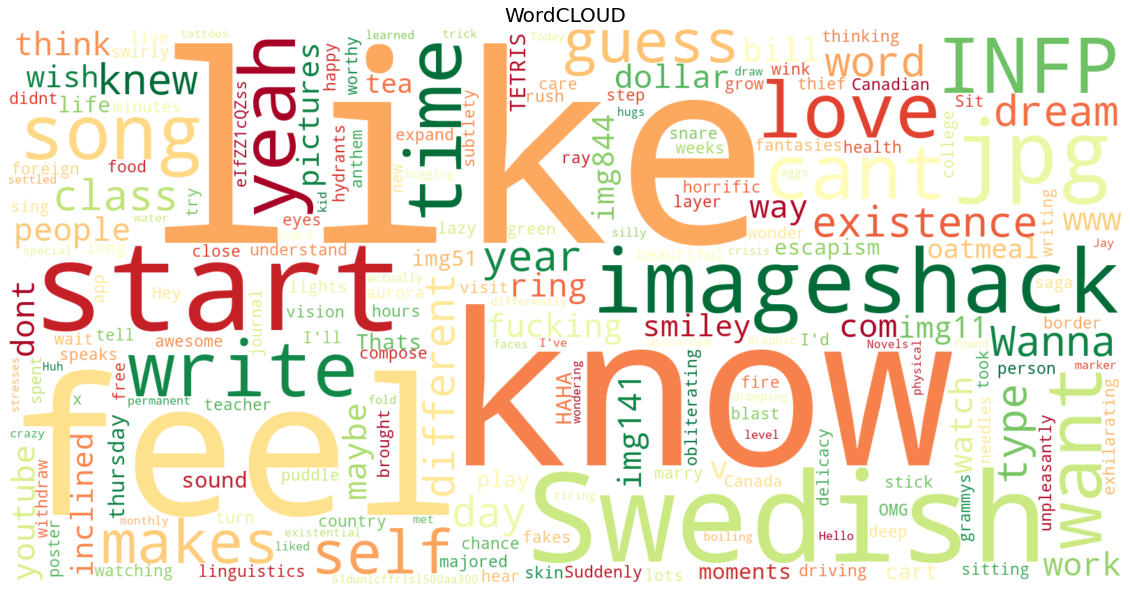

In [441]:
USER = random.randint(0, len(linkedinPROFILEdata))
print("Details of User no:", USER)
PROFILE = linkedinPROFILEdata['posts'].iloc[USER] #2 (for email)  933 for http
PROFILE;
extractINFO(PROFILE)

In [588]:
def sentiment_score(review):
    emojiDICT = {1:"\U0001F621",
        2:"\U0001F641",
        3:"\U0001F610",
        4:"\U0001F642",
        5:"\U0001F47D"}
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    SS = int(torch.argmax(result.logits))+1
    print("Sentiment Score",SS,emojiDICT[SS])
    #gaugemeter(SS)
    return SS

In [589]:
df['sentimentEMojee'] = df['review'].apply(lambda x: sentiment_score(x[:512])) #this BART can take max 512 token at once (if more take avg)

Sentiment Score 5 👽
Sentiment Score 3 😐
Sentiment Score 5 👽
Sentiment Score 5 👽
Sentiment Score 5 👽
Sentiment Score 3 😐
Sentiment Score 4 🙂
Sentiment Score 2 🙁
Sentiment Score 5 👽
Sentiment Score 5 👽
Sentiment Score 4 🙂


In [553]:
df

review  sentiment  \
0   Great food amazing coffee and tea. Short walk ...          5   
1   It was ok. Had coffee with my friends. I'm new...          3   
2   Great staff and food.  Must try is the pan fri...          5   
3   Ricotta hot cakes! These were so yummy. I ate ...          5   
4   I came to Social brew cafe for brunch while ex...          5   
5   It was ok. The coffee wasn't the best but it w...          3   
6   We came for brunch twice in our week-long visi...          4   
7   I went here a little while ago- a beautiful mo...          2   
8   Ron & Jo are on the go down under and Wow!  We...          5   
9   Great coffee and vibe. That's all  you need. C...          5   
10  Great coffee and vibe. That's all  you need. C...          4   

   sentimentEMojee  
0                👽  
1                😐  
2                👽  
3                👽  
4                👽  
5                😐  
6                🙂  
7                🙁  
8                👽  
9                👽  
10               🙂

In [575]:
def posts2sentiment_score(text):
    text = text.split("|||")

    # list to str
    text = ' '.join([str(elem) for elem in text])

    # get EMails
    getEmails(text)

    # get URLs
    getURLs(text)

    # remove URLS
    text_links_null = removeURLs(text)
    
    # remove Emails
    text_links_null = removeEmails(text)

    # Cleaning the text
    Special_stopwords_01 = ["I","... ","I'm","WWW","www","https","http","youtube"]
    stopwords = set(stopwords_NLTK)
    stopwords.update(Special_stopwords_01)
    
    text_clean = " ".join([word for word in str(text_links_null).split() if word not in stopwords])

    # Sentiment Score
    ans = sentiment_score(text_clean[:512]) #text_clean[:512]: first 512 token of each user's post text
    return ans

### RUN on whole data (17 min at full CPU usage)

In [561]:
linkedinPROFILEdata['sentimentEmoji'] = linkedinPROFILEdata['posts'].apply(lambda x: posts2sentiment_score(x[:512]))

***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=qsXHcwe3krw
http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg
https://www.youtube.com/watch?v=iz7lE1g4XM4
https://www.youtube.com/watch?v=uCdfze1etec
http://www.youtube.com/watch?v=vXZeYwwRDw8
http://www.youtube.com/watch?v=u8ejam5DP3E
number of URLS: 6 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=fHiGbolFFGw
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment S

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=djChY6Ol9ig
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs****

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
threadless.com
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://img.tapatalk.com/d/14/04/24/e8e7ery5.jpg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://chzragecomics.files.wordpress.com/2012/07/rage-comics-classic-busted.gif
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://68.media.tumblr.com/7d3fd82e24e28c360d31697d53c2c5e6/tumblr_owk9i1dR7f1u3
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://img230.imageshack.us/img230/5595/26835391158da5fb5500.jpg
number of 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=ncPQ5eb6bL8&feature=related
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
cute'.http://i.imgur.com
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails:

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
htt

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=CBTOGVb_cQg
https://www.youtube.com/watch?v=5s7_WbiR79E
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=JRWox-i6aAk
number

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=dlCjIMW_sqU
https://www.youtube.com/watch?v=Z5WPcUGVZ34
https://www.youtube.com/watch?v=OXP2g121vZk
https://www.youtube.com/watch?v=ECn7TSA7Poc
https://www.youtube.com/watch?v=6QuFknNnr2E
https://www.youtub
number of URLS: 6 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs****

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡


Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=q5c3z-3X09
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
loft·y(lôfhttp://img.tfd.com
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=fvsN-3yL858
http://www.lesjoyauxde

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://notablescents.net/wp-content/uploads/2012/08/lady-gaga-fame-perfume.jpg
http://i.imgur.com/308gGoF.gif
number of URLS: 2 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentimen

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://reactiongifs.us/wp-content/uploads/2013/02/popcorn_stephen_colbert.gif
http://i304.photobucket.com/albums/nn196/Nimbus-Cloud/Stickdeath400th.gif
https://mypantryshelf.files.wordpress.co
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=h81Ojd3d2rY
http://www.youtube.com/watch?v=nfV71vAkZ2c
number of URLS: 2 

Sentiment Score 1 😡
***** Emails***

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=-jr0194uC-M
http://www.youtube.com/watch?v=QXwPUYU8rTI
http://www.youtube.com/watch?v=4F46w1M5A1E
http://www.youtube.com/watch?v=viXMXo1aG-Q
http://www.youtube.com/watch?v=cXROzq4_yj0
number of URLS: 5 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.psychologytoday.com/blog/significant-results/201410/the-surprising-connection-between-intelligence-and-happiness
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=vmFAwzpLbGw&t=97s
https://www.youtube.com/watch?v=STugQ0X1NoI
https://www.youtube.com/watch?v=zuuObGsB0No
https://www.youtube.com/watch?v=cJaGsk3e5ME
https://

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://i45.tinypic.com/333adc2.gif
http://i48.tinypic.com/10wpe6g.gif
http://i46.tinypic.com/2re31nd.gif
number of URLS: 3 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails*

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=G6GiYGaVEpg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=Z7BuQFUhsRM
http://www.youtube.com/watch?v=OvYZMqQffQE
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=8FJUD0rEPWM
http://www.youtube.com/watch?v=z
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment S

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.patenthawk.com/blog_images/troll.jpg
http://thevoiceforschoolchoice.files.wordpress.com/2008/09/corgi-jump.jpg
http://raleighdogolympics.com/images/dog%20under%2007.jpg
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=nL95tYdtk_k
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=lw2Q9fBciu0
https://www.you
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emai

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=aSZVYZTze74
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs****

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=3EZ1_Mziy_c&index=51
https://www.youtube.com/watch?v=UJPJUaZZOss
https://www.youtube.com/watch?v=3EZ1_M
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
numb

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://www.typologycentral.com/forums/images/smilies/sad[1].gif
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.socionics.com/rel/relcht.htm
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails**

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=sKQfTuGVw_E
https://www.youtube.com/watch?v=gRrUf649rzw
https://www.youtube.com/watch?v=xH9kuntkzMw
https://www.youtube.com/watch?v=MPL87C_C_5k
https://www.youtube.com/watch?v=k0gKxgdl7Bw
https://www.youtube.com/watch?v=cFtA0ECKh6I
number of URLS: 6 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=Td1XgkybCdo
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://fc01.deviantart.net/fs71/f/2011/182/9/2/
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i.gyazo.com/3aee0bb847eb8363d3
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://24.media.tumblr.com/tumblr_m4em5dcKKO1qh3c9yo1_500.png
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i.imgur.com/I1nvv6Z.gif
https://tartademanzanacasera.files.wordpress.com/2016/06/dsc09137.jpg?w=317&h=224
number of URLS: 2 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sen

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://youtu.be/P7R3X_ms3Ng
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Sc

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=e12Vsd0CwGs
https://www.youtube.com/watch?v=nbXgHAzUWB0
https://www.youtube.com/watch?v=y6120QOlsfU
https://www.youtube.com/watch?v=y6120QOlsfU
https://www.youtube.com/watch?v=68ugkg9RePc
https://www.youtube
number of URLS: 6 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs***

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://personality-testing.info/tests/images/RIASECi.php?R=9&I=21&A=28&S=27&E=34&C=22
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://fbcdn-sphotos-a-a.akamaihd.net/hphotos-ak-frc1/t1.0-9/1902920_10201923804808072_8765195351802367863_n.jpg
number of URLS: 1 

Sentiment Score 

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=uF-kXoxO3bQ
http://www.youtube.com/watch?v=QLXzSefzVWU
http://www.youtube.com/watch?v=st09w_WDEbA
http://www.youtube
number of URLS: 4 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=_7QQnz0twQM
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=_EzDRpkfaO4
https://www.youtube.com/watch?v=ijSFhJCqqFY
number of URLS: 2 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Email

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=GUXmS5L4SKs
https://www.youtube.com/watch?v=AryNcdOSZs4
https://www.youtube.com/watch?v=D6_W2CKMtpA
https://www.youtube.com/watch?v=D6_W2CKMtpA
number of URLS: 4 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
n

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?feature=player_detailpage&amp;v=IAsXMlkwXgs
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://personalitycafe.com/cognitive-functions/9
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://24.media.tumblr.com/fb1c3465d11b72ed6f6f8eb982328956/tumblr_mirxn6IAQy1r33b6fo1_1280.jpg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

***** URLs******
http://img403.imageshack.us/img403/4827/96943644cw1.jpg
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://i.imgur.com/PKyVGD0.jpg
https://www.shoppersvineyard.com/images/sites/shoppersvineyard/labels/t7503382qi_1.jpg
http://i.imgur.com/CTjwhFa.gif
https://
number of URLS: 4 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

**

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=vyL_RmEXG_I
http://www.youtube.com/watch?v=1ihcLg2sEQc
number of URLS: 2 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Email

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?feature=player_detailpage&v=0wMhhq7zwPc
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://youtu.be/bR5u9jb0PJE
https://www.youtube.com/watch?v=bjyGkvNUtRU
https://www.youtube.com/watch?v=nZVy89j3Bww
https://www.youtube.com/watch?v=d_HlPboLRL8
https://www.youtube.com/watch?v=3apdXnMZpoA
https://www.youtube.com/watch?v=YziVJ71yRik&index=13&list=PLo2nn25A6bVAaKf
number of URLS: 6 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

*

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=UTgqd_MpDrg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=ULyDFp4lnII
https://www.youtube.com/watch?v=7eDkFlVSwnk
https://www.youtube.com/watch?v=EkxgFoWwW5w&list=PL05942C7116C42C78
https://www.youtube.com/watch?v=LXyrJdIqvXA
https://www.youtube.com/watch?v=57__SVX1vMs
number of URLS: 5 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://images.icanhascheezburger.com/completestore/2008/9/21/128665289828743124.jpg
http://2.bp.blogspot.com/_Esz2h6sKmUU/R7oO09kWamI/AAAAAAAAAic/xCxauoBkQWs/s400/Carrey_Riddler.jpg
http://images-mediawiki-sites.thefullwiki.org/03/2/7/8/8063232287061272.png
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails:

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=EEZkQv25uEs
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails*****

***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=khh8H46v0ZY
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://youtu.be/C

***** URLs******
http://i0.wp.com/chrispapazis.files.wordpress.com/2014/02/problem_of_pain1.jpg?resize=455%2C435
https://www.youtube.com/watch?v=DigtCrO77L8
https://www.youtube.com/watch?v=6f78_Tf4Tdk
https://youtu.be/gu3d1yIZAUw
number of URLS: 4 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=79bRngYMf1U&pbjreload=10
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentime

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=bcnIhzaDTd0
https://www.youtube.com/watch?v=6VqyGDW0diI
https://www.youtube.com/watch?v=yZTXFCanDx0
http://i.imgur.com/kDFJZtj.jpg
http://i.imgur.com/rCzIYom.jpg
http://i.imgur.com/ujLkvEt.jpg
http://i.imgur.com/IIUCfLZ.jpg
number of URLS: 7 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
htt

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=I6PYn-0XrgQ
https://www.youtube.com/watch?v=iAwt_JYtY-w
number of URLS: 2 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URL

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://youtu.be/VqKjIT1ECZg
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=0X9fVYDgIZE
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://youtu.be/6mfndf1fQe8
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
nu

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://joylandblog.files.wordpress.com/2009/05/money.jpg
http://mathworld.wolfram.com/images/eps-gif/EternitySolution_600.gif
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://youtu.be/hIGXOfRZGLw
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

*

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=bzAGZT_X

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=RsAgmnEKV10
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=k-3c2yqzCFQ
https://web.archive.org/web/20161013020138/http://individunification.com/2.2131%20The%20Inferior%20Function.html
https://www.youtube.com/watch?v=gtJp350jtmY
https://www.youtube.com/watch?v=Wz_d_D4D-7I
https://www.youtube.c
number of URLS: 5 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=ZSLb0Ov-jHU
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 


Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=AZxYFcaDiuM
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://mbtiresourcerer.blogspot.com/
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?feature=player_embedded&am

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
n

***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=rGA7JyyEKhk
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=o6tsXdfrGXQ&feature=player_embedded
http://www.youtube.com/watch?v=eRfBqoGVFXc
http://www.youtube.com/watch?v=R_f_mMJAezM
http://25.media.tumblr.com/tumblr_lm6byweZbC1qjvm9yo1_500.gif
http://www.youtube.com/watch?v=bqg90Qj2ApU
http://www.youtube.com/watch?v=YemhxC9OpSw
number of URLS: 6 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=2h

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://yandex.com/images/search?text=coneheads
https://www.youtube.com/watch?v=31t07ZeCNlQ
https://www.youtube.com/watch?v=o589CAu73UM
https://www.youtube.com/watch?v=GOuHbx7krCk
http://www.youtube.com/watch?v=pWGoj1SR6RE
http://www.youtube.com/watch?v=SIg2VrnW8
http://www.youtube.com/watch?v=hTNDkvL03yM
http://www.youtube.com/watch?v=-
number of URLS: 8 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://66.media.tumblr.com/679b77838189de3972becfdb9c882d4e/tumblr_msmg2tggPH1qah4rlo2_1280.jpg
https://49.media.tumblr.com/2f32a9607303e18608fcf0e0a8b3d317/tumblr_o645jd71Wl1tlb56zo1_400.gif
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=S0e6zIchIqI
https://www.yout

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://fuckyeahinteriordesigns.tumblr.com/post/4191485627
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://i40.tinypic.com/2uygnlx.jpg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
*****

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i56.tinypic.com/e6o8w2.jpg
http://www.youtube.com/watch?v=qUlEw4xAG-0
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=3sT569-ftdM
http://upload.wikimedia.org/wikipedia/commons/e/ef/1969_Chevrolet_Corvette_Sti

***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=kNdKERQP1_Y&NR=1&feature=fvwp
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://i222.photobucket.com/albums/dd228/franzx7/mrnaughty.gif
http://www.youtube.com/watch?v=E7p3xcdcC8k
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** UR

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=6lapculOf

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=gDyDKzpWBY0
http://www.youtube.com/watch?v=DCprHDVUV7E
http://www.youtube.com/watch?v=TKchMvDsCVA
http://www.youtube.com/watch?v=rzpW7P83sb4&amp;feature=player_embedded
number of URLS: 4 

Sentiment Score 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=DTQ6JjAEdGA
http://www.youtube.com/watch?v=tlbZnv5DApY
http://www.youtube.com/watch?v=sS_PSvo_Tzo
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=ZEBGCOCxLgA
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=fMZ4gHGAIkA
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://i.imgu
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
numbe

***** URLs******
http://www.youtube.com/watch?v=JOqsabuuXL0
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=JKQwgpaLR6o
https://www.youtube.com/watch?v=sc5iTNVEOAg
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=k3pltmw6cmI
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sent

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.cartoonstock.com/newscartoons/cartoonists/mba/lowres/mban1510l.jpg
http://shechive.files.wordpress.com/2012/03/jim-carrey-13.jpg?w=500&h=663
http://25.media.tumblr.com/tumblr_lpwc1wAxBU1qeeqk5o1_500.jpg
http://www.youtube.com/watch?v=7mBfW-CdgLE&amp;list=PLnbpvtoIoqaAxXeGYZ7mOI6k-l_GLUWvs
http://www.youtube.com/watch?v=NirRMrpbCFQ&amp;feature=share&amp;list=PLnbpvtoIoq
number of UR

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=ObGlgJPCZj4
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://fbcdn-sphotos-f-a.akamaihd.net/hphotos-ak-xpa1/t31.0-8/1519173_684541898263153_1097624371_o.jpg
http://bit.ly/1gr7vZe
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number o

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://i52.tinypic.com/28kndqs.jpg
http://i48.tinypic.com/2eycexi.jpg
http://photos-f.ak.instagram.com/hphotos-ak-xaf1/10747738_823945004292893_536617615_n.jpg
https://www.you
number of URLS: 4 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
n

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.google.com/search?q=monsters+inc+always+watching&rls=com.microsoft:en-US:IE-SearchBox&tbm=isch
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs*

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watc
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://youtu.be/uBp7lqoyrok
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=qKBR8S7RCwA
http://upload.wikimedia.org/wikipedia/commons/7/7e/1995-1997_Toyota_Avalon.jpg
number of URLS: 2 

Sentiment Score 2 🙁
***** Emails****

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=UtmNCXSIr-Q
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails*****

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://media.giphy.com/media/GCLlQnV7wzKLu/giphy.gif
https://s-media-cache-ak0.pinimg.com/originals/1a/81/2c/1a812c1501816aa35783ffd2b07fb45f.jpg
http://m.likesuccess.com/quotes/16/752914.png
number of URLS: 3 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=Swxw2t-9ir4
http://www.youtube.com/watch?v=IQtLeCoqkd0
http://nirvanablog.com/wp-content/uploads/2013/04/kurt-

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://iambrony.jsmart.web.id/mlp/gif/43840__safe_twilight-sparkle_rainbow-dash_pinkie-pie_fluttershy_rarity_applejack_spike_animated_spoi

***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=0oDBHMV1VJk
https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-9/14925675_10154345897878141_8445289469619682983_n.jpg?oh=ed8b94f844e17f90f8ba2cf28a9b3f28&oe=588F230F
https://www.youtube.com/watch?v=Yw4FPp8SaZM
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

S

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://images.clickedit.co.uk/8545/84810091.JPG
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=PGoCtJzPHkU
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://www.verk.dk/blog/strategy/files/2009/09/winchester_mystery_house_san_jose_ca_001.jpg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=-pO_mlZDlFo
https://www.youtube.com/watch?v=_QdPW8JrYzQ
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emai

***** Emails******
number of Emails: 0 

***** URLs******
http://tapatalk.imageshack.com/v2/14/09/02/b9f805136d146f5280a6bd3a52db034e.jpg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=CuzZ8mV9Zh8
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://media.tumblr.com/tumblr_m65

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=JoLTdwDtxqk
http://funnyshare.org/s/07/24607.jpg
http://www.youtube.com/watch?v=uImFYhgD5ww
number of URLS: 3 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=OjETibEMbJY
https://www.youtube.com/watch?v=yupYyOllfo0
https://www.youtube.com/watch?v=A-UTPKL-UGY
https://www.youtube.com/watch?v=AyT-deoK
number of URLS: 4 

Sentiment Score 2 

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=amwVyRH2B8A
http://www.youtube.com/watch?v=Vp_WvzFnbHQ
number of URLS: 2 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Ema

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=rejA6QRtrAI&list=PLMUUnJPp36aWDf-vQs7yKER4CbQA9kyc9&index=428
https://www.youtube.com/watch?v=mVsQwJfWzoI&index=1&list=LLZG4zlZUfz1sY_2PXUailoQ
https://www.youtube.com/watch?v=6AhXSoKa8xw
http://vignette3.wikia.nocookie.net/vampirediaries/images/e/ec/Welcome-to-the-club-gif.gif/revision/latest?cb=20141214180113
https://www.youtube.com/wa
number of URLS: 5 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.theatlantic.com/health/archive/2015/09/people-lo

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
n

number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=6v6HlbPvsKQ
http://onlypositive.net/image.axd?picture=2011%2F5%2Ftigers-kinda-kiss.jpg
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.facebook.com/photo.php?fbid=859204454113650&set=pcb.859204524113643&type=1&theater229626
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs***

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.wired.com/images_blogs/wiredscience/2011/11/friedmaneq12.jpg
https://www.youtube.com/watch?v=5oCXxUg0SJA
https://www.tedcruz.org/wp-content/uploads/2015/05/ted-cruz-logo_160.png
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
Mr.by
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
*

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://cdn.buzznet.com/assets/users16/ashleeholmes/default/cutest-kittens-ever--large-msg-134427754736.jpg
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs*

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.enfrentearte.com/hotel-ronda/uploaded_images/goldfrapp-706778.jpg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://personalitycafe.com/member-photos-videos/304-portraits-personalitycafe-members-member-photos-pics-only-no-discussion-211.html
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentim

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i1024.photobucket.com/albums/y306/NinjaSwan/Derp/herp.jpg?t=1283413990
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 


Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=9QriwkLu6H0
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://www.amazon.com/gp/aw/d/0380810336
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails*

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://images.moviepilot.com/images/c_fill,h_282,w_500/t_mp_quality_gif/i9f6vganklchecyyxkcd/the-legendary-warrior-that-inspired-disney-s-mulan-is-pretty-badass-credit-disney-337896.jpg
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=wa2nLEhUcZ0
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://enneagramcentral.com/Explore/Harry1.htm
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs

***** URLs******
http://www.youtube.com
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://images.fineartamerica.com/images-medium-large/empty-inside-judi-davidson.jpg
http://25.media.tumblr.com/tumblr_lig0ivB8Dk1qzx2p7o1_500.jpg
http://24.media.tumblr.com/tumblr_m674smo5iR1qhj50so1_500.gif
number of URLS: 3 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=P9_hegaKOaY&feature=related
http://www.youtube.com/watch?v=qM0zINtulhM&feature=autoplay&list=PLB60A284242DFAE26&index=130&playnext=4
http://www.youtube.com/watch?v=y8AWFf7EAc4
http://www.youtube.com/watch?v=OIh3nO6-V_A&feature=BF&list=PL590E8B74C5E2B4C0&index=49
http://www.youtube.com/watch?v=E8FwefQgieY
http://www.youtube.com/watch?v=E8FwefQgieY&list=PLB60A284242DFAE26&index=165&playnext=1
number of URLS: 6 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://farm3.staticflickr.com/2856/13311906764_6dc7073996_c.jpg
http://farm3.staticflickr.com/2864/13311908644_2e88b63cea_c.jpg
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://imgs.xkcd.com/comics/air
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails:

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i.imgur.com/ACXpNSs.jpg
http://i.

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=sFTw3bckVtY
https://www.youtube.com/watch?v=yM7L9xG5ewo
https://www.youtube.com/watch?v=ephecK8GUik
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://i62.tinypic.com/ae1dsi.jpg
http://i60.tinypic.com/2ilzrkn.jpg
number of URLS: 2 

Sentiment Score

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://personalitycafe.com/entp-forum-visionaries/90987-you-know-youre-female-entp-when-3.html#post2283431
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=-LhgCkXUyzc
https://www.youtube.com/watch?v=Ih4bm-91Wq4
https://www.facebook.com/photo.php?v=1020

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=yw4maxWNckE
https://31.media.tumblr.com/ac98e137f96eb74dfa617e7a7be07df5/tumblr_inline_n63sl3jxgu1sg3vhd.png
number of URLS: 2 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://tapatalk.imageshack.com/v2/15/02/12/3f71a66310c9c7ffabf1e5170fa815ad.jpg
http://tapatalk.imageshack.com/v2/15/02/12/54ed3edbbe211d62b90a0916a12a688f.jpg
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=RmOIDAa3Dy0
number of URLS: 1 

Sentiment Score 1 😡
***** Email

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://doblelol.com/uploads/11/watch-funny-animal-videos.jpg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=qK7LThfDrEc
https://www.youtube.com/watch?v=BIuMGGNTmL0&list=RDBIuMGGNTmL0&index=1
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://sphotos.xx.fbcdn.net/hphotos-snc7/404115_359041200815064_810607505_n.jpg
http://sphotos.xx.fbcdn.net/hphot
number of URLS: 2 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number 

***** URLs******
http://poorlydrawnlines.com/wp-content/uploads/2016/08/time-traveled.png
http://i.imgur.com/NYepHRB.jpg
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Ema

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=K_LhSmtzE1A
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i.imgur.com/pwrmI.jpg
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number

***** URLs******
http://pstypes.blogspot.com/search/label/Misidentifications
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=epRB03P1vvE
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=Yke-gv8TyyE
http://www.youtube.com/watch?v=nBeJO6rZX9A
http://www

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://oi51.tinypic.com/adkznp.jpg
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=HCoZRmqKmQ8
https://www.youtube.com/watch?v=WcRgqXYmzZE
number of URLS: 2 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://38.media.tumblr.com/234cdb31be2fa3ad6d41557e0a7a837d/tumblr_inline_nwialtoUHs1sydsae_500.gif
https://en.wikipedia.org/wiki/Ad_hominem
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://scontent-arn2-1.xx.fbcdn.net/v/t1.0-9/21106774_10212341060578842_828166527260653691_n.jpg?oh=

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=HWf6KvoGgAI
http://www.youtube.com/watch?v=24fGmWG6kpg
http://www.youtube.com/watch?v=-zqYJj5ucG8
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡


***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=s9eVz3I4mBg
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=fahr069-fzE
https://www.youtube.com/watch?v=DhT5lmp7drM
number of URLS: 2 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=RvK8SKZbBWg
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=q99VsIec2gg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs***

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=qc98u-eGzlc
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://i.imgur.com/9lOQCj2.png
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
numbe

***** Emails******
number of Emails: 0 

***** URLs******
http://media-cache-ak0.pinimg.com/736x/96/8b/c8/968bc800068b28184cad7a375f847bc6.jpg
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emai

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://i.redd.it/0l909i2vva0y.png
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=ym31mIwFfxE
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******


Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁


***** Emails******
number of Emails: 0 

***** URLs******
intp.org
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://personalitycafe.com/images/styles/AnimatedArena/misc/pencil.png
http://www.youtube.com/watch?v=p0D8ULwuusU&feature=related
http://www.youtube.com/watch?v=0XYMK81jwrw
http://www.youtube.com/watch?v=xOpyKHJ-w1c
http://www.youtube.com/watch?v=4DgUtE31CT0
http://www.youtube.com/watch?v=UVA7MDQr1Nc
number of URLS: 6 

Sentiment Score 1 😡
***

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i.imgur.com/lRMAzpM.png
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
num

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://m.facebook.com/story.php?story_fbid=1089364147875298&id=100004051705348
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=4N3N1MlvVc4
https://www.youtube.com/watch?v=HyHNuVaZJ-k
https://www.youtube.com/watch?v=S0BDS0-ZwOw
https://www.youtube.com/watch?v=ZJ4WqYwE1XY
https://media.giphy.com/media/3o7ZeL6mKuJ

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
num

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://i.imgur.com/ZGQHggH.gif
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=K4E9412xyJ4
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
last.fm
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=iChvmZ_B3rc&feature=rela

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=WQlkfKZMuHk
http://www.youtube.com/watch?v=9mDJ8bLrMfA&list=FLiWLjELGtdcK-M8YP4-2XbQ&index=21
http://www.youtube.com/watch?v=fvDQy53eldY
http://www.youtube.com/watch?v=hlVBg7_08n0
http://www.youtube.com/watch?v=Cx8FYUrgVP4
number of URLS: 5 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
nu

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=cpbbuaIA3Ds
http://www.motifake.com/image/demotivational-poster/1
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=ZoLXPa4vw9
https://www.youtube.com/watch?v=7eKv4BEujFU
number of URLS: 2 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://youtu.be/YJVmu6yttiw
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=dPmBle0Dljw
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁


***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://img441.imageshack.us/img441/6946/83108.jpg
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://personalitycafe.com/guess-type/7259-friends-tv-show.html
http://personalitycafe.com/guess-type/43019-skins.html
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment 

***** Emails******
number of Emails: 0 

***** URLs******
https://s.deviantart.com/th/fs71/i/2011/236/4/5/coastal_by_valdyrnordvindr-d47qcdv.jpg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=yY96hTb8WgI
https://www.youtube.com/watch?v=pnv5iKB2hl4
http://personalitycafe.com/attachments/intp-forum-thinkers/463298d1452870083-confessions-intp-science.jpg
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emai

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://i.pinimg.com/236x/ee/67/cc/ee67cc2302dfe913ae782b50fad44cfa.jpg
https://i.pinimg.com/564x/ba/07/67/ba07675b43bf6f3328ac2b1fce0e1d5d.jpg
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.jedword.com/wp-content/uploads/2012/03/contemplation1.jpg
number of URLS: 1 

Sentiment Score 3 😐
***

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂


***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
last.fm
http://www.youtube.com/watch?v=QtwsYOpUon4
number of URLS: 2 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emai

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
htt

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=updoMIHMBbU
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=MrlOuyOxiFE&feature=endscreen&NR=1
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentimen

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=zORUUqJd81
https://www.youtube.com/watch?v=jgVxQ5uo6Jc
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=lyieFu7BnHE
number 

number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=3nJ4RInGt9E
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score

In [562]:
linkedinPROFILEdata

type                                              posts sentimentEmoji
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              😡
1     ENTP  'I'm finding the lack of me in these posts ver...              😡
2     INTP  Good one  _____   https://www.youtube.com/watc...              😡
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...              🙁
4     ENTJ  'You're fired.|||That's another silly misconce...              😡
...    ...                                                ...            ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...              😡
8671  ENFP  'So...if this thread already exists someplace ...              😡
8672  INTP  'So many questions when i do these things.  I ...              👽
8673  INFP  'I am very conflicted right now when it comes ...              😡
8674  INFP  'It has been too long since I have been on per...              🙁

[8675 rows x 3 columns]

In [590]:
linkedinPROFILEdata['sentimentNUM'] = linkedinPROFILEdata['posts'].apply(lambda x: posts2sentiment_score(x[:512]))

***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=qsXHcwe3krw
http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg
https://www.youtube.com/watch?v=iz7lE1g4XM4
https://www.youtube.com/watch?v=uCdfze1etec
http://www.youtube.com/watch?v=vXZeYwwRDw8
http://www.youtube.com/watch?v=u8ejam5DP3E
number of URLS: 6 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=fHiGbolFFGw
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment S

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=djChY6Ol9ig
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs****

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
threadless.com
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://img.tapatalk.com/d/14/04/24/e8e7ery5.jpg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://chzragecomics.files.wordpress.com/2012/07/rage-comics-classic-busted.gif
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://68.media.tumblr.com/7d3fd82e24e28c360d31697d53c2c5e6/tumblr_owk9i1dR7f1u3
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://img230.imageshack.us/img230/5595/26835391158da5fb5500.jpg
number of 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=ncPQ5eb6bL8&feature=related
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
cute'.http://i.imgur.com
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
n

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=CBTOGVb_cQg
https://www.youtube.com/watch?v=5s7_WbiR79E
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emai

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=dlCjIMW_sqU
https://www.youtube.com/watch?v=Z5WPcUGVZ34
https://www.youtube.com/watch?v=OXP2g121vZk
https://www.youtube.com/watch?v=ECn7TSA7Poc
https://www.youtube.com/watch?v=6QuFknNnr2E
https://www.youtub
number of URLS: 6 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs****

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
num

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=q5c3z-3X09
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
loft·y(lôfhttp://img.tfd.com
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number 

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://notablescents.net/wp-content/uploads/2012/08/lady-gaga-fame-perfume.jpg
http://i.imgur.com/308gGoF.gif
number of URLS: 2 

Sentiment Score 3 😐
***** Em

number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=zmY8mG4_3j4
http://www.artcyclopedia.org/art/wi
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://reactiongifs.us/wp-content/uploads/2013/02/popcorn_stephen_colbert.gif
http://i304.photobucket.com/albums/nn196/Nimbus-Cloud/Stickdeath400th.gif
https://mypantryshelf.files.wordpress.co
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
*

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://i.giphy.com/ePeHKwWSed0Ag.gif
http://i.giphy.com/11ADmvDkfXGQOk.gif
http://i.giphy.com/dcubXtnbck0RG.gif
http://i.giphy.com/c3XM8SZ4g2Teg.gif
number of URLS: 4 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=-jr0194uC-M
http://www.youtube.com/watch?v=QXwPUYU8rTI
http://www.youtube.com/watch?v=4F46w1M5A1E
http://www.youtube.com/watch?v=viXMXo1aG-Q
http://www.youtube.com/watch?v=cXROzq4_yj0
number of URLS: 5 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.psychologytoday.com/blog/significant-results/201410/the-surprising-connection-between-intelligence-and-happiness
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
*

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://i45.tinypic.com/333adc2.gif
http://i48.tinypic.com/10wpe6g.gif
http://i46.tinypic.com/2re31nd.gif
number of URLS: 3 

Sentiment Sco

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=G6GiYGaVEpg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=Z7BuQFUhsRM
http://www.youtube.com/watch?v=OvYZMqQffQE
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=8FJUD0rEPWM
http://www.youtube.com/watch?v=z
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment S

***** URLs******
15758http://http://www.google.co.uk
http://img1.eyefetch.com
http://www.eyefetch.com
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.patenthawk.com/blog_images/troll.jpg
http://thevoiceforschoolchoice.files.wordpress.com/2008/09/corgi-jump.jpg
http://raleighdogolympics.com/images/dog%20under%2007.jpg
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=nL95tYdtk_k
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=lw2Q9fBciu0
https://www.you
number of URLS: 2 

Sentim

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=aSZVYZTze74
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs****

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=3EZ1_Mziy_c&index=51
https://www.youtube.com/watch?v=UJPJUaZZOss
https://www.youtube.com/watch?v=3EZ1_M
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Se

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://www.typologycentral.com/forums/images/smilies/sad[1].gif
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.socionics.com/rel/relcht.htm
number of URLS: 1 

Sentiment Score 1 😡
***** Emails**

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=1sjlbqgCt9w
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=sKQfTuGVw_E
https://www.youtube.com/watch?v=gRrUf649rzw
https://www.youtube.com/watch?v=xH9kuntkzMw
https://www.youtube.com/watch?v=MPL87C_C_5k
https://www.youtube.com/watch?v=k0gKxgdl7Bw
https://www.youtube.com/watch?v=cFtA0ECKh6I
number of URLS: 6 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=Td1XgkybCdo
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 



***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://personalitycafe.com/guess-type/413594-dere-types-mbti.html
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i.gyazo.com/3aee0bb847eb8363d3
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://24.media.tumblr.com/tumblr_m4em5dcKKO1qh3c9yo1_500.png
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i.imgur.com/I1nvv6Z.gif
ht

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
n

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://stwww.skateboardermag.com/files/2011/09/Dylan-Rieder.jpg
http://data1.whicdn.com/images/33545555/tumblr_m3qn8llpN31rnoquao1_500_large.png
http://thedroidyourelookingfor.files.wordpress.com/2012/02/magician-42.jpg
http://cinecube.files.wordpress.com/2012/05/f-for-fake-welles-criterion-dvd-review-sub-sample.jpeg
http://userserve-ak.last.fm/serve/500/72029714/Bon+Iver+++DL+ANDERSON.png
http://25.media.tumblr.com/0b37510
number of URLS: 6 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=e12Vsd0CwGs
https://www.youtube.com/watch?v=nbXgHAzUWB0
https://www.yo

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://personality-testing.info/tests/images/RIASECi.php?R=9&I=21&A=28&S=27&E=34&C=22
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails

***** Emails******
number of Emails: 0 

***** URLs******
http://www.yout
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=fBkvcQEGq9k
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=uF-kXoxO3bQ
http://www.youtube.com/watch?v=QLXzSefzVWU
http://www.youtube.com/watch?v=st09w_WDEbA
http://www.youtube
number of URLS: 4 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=_7QQnz0twQM
numb

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=GUXmS5L4SKs
https://www.youtube.com/watch?v=AryNcdOSZs4
https://www.youtube.com/watch?v=D6_W2CKMtpA
https://www.youtube.com/watch?v=D6_W2CKMtpA
number of URLS: 4 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sen

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?feature=player_detailpage&amp;v=IAsXMlkwXgs
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://personalitycafe.com/cognitive-functions/9
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://img403.imageshack.us/img403/4827/96943644cw1.jpg
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://i.imgur.com/PKyVGD0.jpg
https://www.shoppersvineyard.com/images/sites/shoppersvineyard/labels/t7503382qi_1.jpg
http://i.imgur.com/CTjwhFa.gif
https://
number of URLS: 4 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

**

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://farm9.staticflickr.com/8206/8234471152_2f71a5021c_b.jpg
http://www.youtube.com/watch?v=s09_NEpTIaw&feature=related
http://www.youtube.com/watch?v=t-vTaktsUSw&feature=autoplay&list=WL2F5B8CF2EF6B043D&index=18&playnext=2
http://www.youtube.com
number of URLS: 4 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

****

***** Emails******
number of Emails: 0 

***** URLs******
http://pers
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?feature=player_detailpage&v=0wMhhq7zwPc
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails:

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=UTgqd_MpDrg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs***

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://images.icanhascheezburger.com/completestore/2008/9/21/128665289828743124.jpg
http://2.bp.blogspot.com/_Esz2h6sKmUU/R7oO09kWamI/AAAAAAAAAic/xCxauoBkQWs/s400/Carrey_Riddler.jpg
http://images-med

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
num

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=AzlCIS072_Y
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=khh8H46v0ZY
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Email

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i0.wp.com/chrispapazis.files.wordpress.com/2014/02/problem_of_pain1.jpg?resize=455%2C435
https://www.youtube.com/watch?v=DigtCrO77L8
https://www.youtube.com/watch?v=6f78_Tf4Tdk
https://youtu.be/gu3d1yIZAUw
number of URLS: 4 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://scontent-b-ord.xx.fbcdn.net/hphotos-ash3/t1/1425538_10152156619924330_157902031_n.jpg
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=fRyHDBWKLzI
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

S

***** URLs******
https://www.youtube.com/watch?v=Jid_Oe8OLzE
https://www.youtube.com/watch?v=ZfxjkfzySbI
https://m.youtube.com/watch?v=R83mSx7Q6Y0
https://m.youtube.com/watch?v=rx7q7U8IUuY
https://www.youtube.com/watch?v=1tVFIXGWsmY
https://www.youtube.com/watch?v=Q3N-fFV-f3Q
https://m.youtube.com/watch?v=a4l-GGl1Wo00
https://m.youtube.com/watch?v=_-QxSh19nDI
number of URLS: 8 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emai

***** URLs******
https://www.youtube
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://img.ponibooru.org/_images/aeda9f2e91fa2188d0376d68af27eb77/60314%20-%20Discord%20artist%3Acrappyunicorn%20celestia%20comic.png|
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=I6PYn-0XrgQ
https://www.youtube.com/watch?v=iAwt_JYtY-w
number of URLS: 2 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails**

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://youtu.be/VqKjIT1ECZg
number of UR

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=k9GVk3AclEM
http://www.youtube.com/watch?v=B8qg_0P9L6c
number of URLS: 2 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://joylandblog.files.wordpress.com/2009/05/money.jpg
http://mathworld.wolfram.com/images/eps-gif/EternitySolution_600.gif
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://youtu.be/hIGXOfRZGLw
number of URLS: 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=8-6iVkWFhzs
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs***

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://etyman.files.wordpress.com/2012/03/apple-cult.jpg
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=RsAgmnEKV10
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=k-3c2yqzCFQ
https://web.archive.org/web/20161013020138/http://individunification.com/2.2131%20The%20Inferior%20Function.html
https://www.youtube.com/watch?v=gtJp350jtmY
https://www.youtube.com/watch?v=Wz_d_D4D-7I
https://www.youtube.c
number of URLS: 5 

Sentim

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=X6o5dEUmusQ
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs***

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://1.bp.blogspot.com/-obmTh6C5JOQ/VDEtGROmWDI/AAAAAAAAb0Y/BeZThT1aA2A/s1600/a%2Btree.jpg
http://cdn.diply.com
number of URLS: 2 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
****

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=uTmZYcCjj9Q
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=rGA7JyyEKhk
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emai

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=EQRZHxdl8h8
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=o6tsXdfrGXQ&feature=player_embedded
http://www.youtube.com/watch?v=eRfBqoGVFXc
http://www.youtube.com/watch?v=R_f_mMJAezM
http://25.media.tumblr.com/tumblr_lm6byweZbC1qjvm9yo1_500.gif
http://www.youtube.com/watch?v=bqg90Qj2ApU
http://www.youtube.com/watch?v=YemhxC9OpSw
number of URLS: 6 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://yandex.com/images/search?text=coneheads
https://www.youtube.com/watch?v=31t07ZeCNlQ
https://www.youtube.com/watch?v=o589CAu73UM
https://www.youtube.com/watch?v=GOuHbx7krCk
http://www.youtube.com/watch?v=pWGoj1SR6RE
http://www.youtube.com/watch?v=SIg2VrnW8
http://www.youtube.com/watch?v=hTNDkvL03yM
http://www.youtube.com/watch?v=-
number of URLS: 8 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs*


Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=KwETUXKSmbg
http://personalitycafe.com/members/ingenuefatale-albums-former-avatars-picture235194-family.png
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs****

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://personalitycafe.com/intj-forum-scientists/35938-what-bothers-you-about-enfps.html
http://images2.memegenerator.net/Interesting-Troll/ImageMacro/2808264/I-dont-always-Troll-But-when-I-do-I-am-Successful.jpg
number of URLS: 2 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://fuckyeahinteriordesigns.tumblr.com/post/4191485627
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://i40.tinypic.com/2uygnlx.jpg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentimen

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i56.tinypic.com/e6o8w2.jpg
http://www.youtube.com/watch?v=qUlEw4xAG-0
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
nu

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=GurkREc-q4I
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=kNdKERQP1_Y&NR=1&feature=fvwp
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://i222.photobucket.com/albums/dd228/franzx7/mrnaughty.gif
http://www.youtube.com/watch?v=E7p3xcdcC8k
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Senti

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=6lapculOf

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=gDyDKzpWBY0
http://www.youtube.com/watch?v=DCprHDVUV7E
http://www.youtube.com/watch?v=TKchMvDsCVA
http://www.youtube.com/watch?v=rzpW7P83sb4&amp;feature=player_embedded

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=DTQ6JjAEdGA
http://www.youtube.com/watch?v=tlbZnv5DApY
http://www.youtube.com/watch?v=sS_PSvo_Tzo
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=ZEBGCOCxLgA
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=fMZ4gHGAIkA
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://i.imgu
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
numbe

***** URLs******
http://www.youtube.com/watch?v=JOqsabuuXL0
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=JKQwgpaLR6o
https://www.youtube.com/watch?v=sc5iTNVEOAg
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=k3pltmw6cmI
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sent

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.cartoonstock.com/newscartoons/cartoonists/mba/lowres/mban1510l.jpg
http://shechive.files.wordpress.com/2012/03/jim-carrey-13.jpg?w=500&h=663
http://25.media.tumblr.com/tumblr_lpwc1wAxBU1qeeqk5o1_500.jpg
http://www.youtube.com/watch?v=7mBfW-CdgLE&amp;list=PLnbpvtoIoqaAxXeGYZ7mOI6k-l_GLUWvs
http://www.youtube.com/watch?v=NirRMrpbCFQ&amp;feature=share&amp;list=PLnbpvtoIoq
number of URLS: 5 

Sentiment Score 1 😡
***** Ema

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=ObGlgJPCZj4
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://fbcdn-sphotos-f-a.akamaihd.net/hphotos-ak-xpa1/t31.0-8/1519173_684541898263153_1097624371_o.jpg
http://bit.ly/1gr7vZe
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number o

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://i52.tinypic.com/28kndqs.jpg
http://i48.tinypic.com/2eycexi.jpg
http://photos-f.ak.instagram.com/hphotos-ak-xaf1/10747738_823945004292893_536617615_n.jpg
https://www.you
number of URLS: 4 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
n

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.google.com/search?q=monsters+inc+always+watching&rls=com.microsoft:en-US:IE-SearchBox&tbm=isch
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment S

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watc
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://youtu.be/uBp7lqoyrok
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=qKBR8S7RCwA
http://upload.wikimedia.org/wikipedia/commons/7/7e/1995-1997_Toyota_Avalon.jpg
number of URLS: 2 

Sentiment Score 2 🙁
***** Emails****

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=UtmNCXSIr-Q
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs***

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://media.giphy.com/media/GCLlQnV7wzKLu/giphy.gif
https://s-media-cache-ak0.pinimg.com/originals/1a/81/2c/1a812c1501816aa35783ffd2b07fb45f.jpg
http://m.likesuccess.com/quotes/16/752914.png
number of URLS: 3 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=Swxw2t-9ir4
http://www.youtube.com/watch?v=IQtLeCoqkd0
http://nirvanablog.com/wp-content/uploads/2013/04/kurt-

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://iambrony.jsmart.web.id/mlp/gif/43840__safe_twilight-sparkle_rainbow-dash_pinkie-pie_fluttershy_rarity_applejack_spike_animated_spoi

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=0oDBHMV1VJk
https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-9/14925675_10154345897878141_8445289469619682983_n.jpg?oh=ed8b94f844e17f90f8ba2cf28a9b3f28&oe=588F230F
https://www.youtube.com/watch?v=Yw4FPp8SaZM
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
n

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://images.clickedit.co.uk/8545/84810091.JPG
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=PGoCtJzPHkU
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://www.verk.dk/blog/strategy/files/2009/09/winchester_mystery_house_san_jose_ca_001.jpg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=-pO_mlZDlFo
https://www.youtube.com/watch?v=_QdPW8JrYzQ
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of E

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=CuzZ8mV9Zh8
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://media.tumblr.com/tumblr_m658fb3p6C1qg3g8c.gif
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
*

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=JoLTdwDtxqk
http://funnyshare.org/s/07/24607.jpg
http://www.youtube.com/watch?v=uImFYhgD5ww
number of URLS: 3 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=OjETibEMbJY
https://www.youtube.com/watch?v=yupYyOllfo0
https://www.youtube.com/watch?v=A-UTPKL-UGY
https://www.youtube.com/watch?v=AyT-deoK
number of URLS: 4 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=amwVyRH2B8A
http://www.youtube.com/watch?v=Vp_WvzFnbHQ
number of URLS: 2 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.availableimages.com/television/d/3827-1/c

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.theatlantic.com/health/archive/2015/09/people-love-the-myers-briggs-personality-test/404737/
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Sco

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=wcXi-VYy_Yw
http://www.youtube.com/watch?v=cAFsoz0IH44
number of URLS: 2 

Sentiment Score 5 👽
***** Emails

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.facebook.com/photo.php?fbid=859204454113650&set=pcb.859204524113643&type=1&theater229626
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.wired.com/images_blogs/wiredscience/2011/11/friedmaneq12.jpg
https://www.youtube.com/watch?v=5oCXxUg0SJA
https://www.tedcruz.org/wp-content/uploads/2015/05/ted-cruz-logo_160.png
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
Mr.by
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=6EjJsPylEOY
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs*****

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://cdn.buzznet.com/assets/users16/ashleeholmes/default/cutest-kittens-ever--large-msg-134427754736.jpg
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=gx7FyB8dRP4
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

*****

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://personalitycafe.com/member-photos-videos/304-portraits-personalitycafe-members-member-photos-pics-only-no-discussion-211.html
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http:

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i1024.photobucket.com/albums/y306/NinjaSwan/Derp/herp.jpg?t=1283413990
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
n

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://www.amazon.com/gp/aw/d/0380810336
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://images.moviepilot.com/images/c_fill,h_282,w_500/t_mp_quality_gif/i9f6vganklchecyyxkcd/the-legendary-warrior-that-inspired-disney-s-mulan-is-pretty-badass-credit-disney-337896.jpg
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of UR

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐


Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://enneagramcentral.com/Explore/Harry1.htm
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://youtu.be/FwHhIejM5y0
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=sHw5vSz793o&list=PLDAcx4AOjthNg

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://en.wikipedia.org/wiki/World-syst

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=PMivT7MJ41
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://s-media-cache-ak0.pinimg.com/736x/6a/0f/d9/6a0fd9bea9176e2cbb5f0608dbe662c0--tandem-bikes-umbrella-art.jpg
https://www.youtube.com/watch?v=vWD7k6TrJ-g
number of URLS: 2 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Scor

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://youtu.be/09PscYgSDrk
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=6hFVJ_2GU_o
https://www.youtube.com/watch?v=UI_Ia_nZ48k
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

**

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i.imgur.com/ACXpNSs.jpg
http://i.imgur.com/xdf9y9P.png
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=EPPgx2_y73
https://www.youtube.com/watch?v=hiwi7d0f91Y
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emai

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://i62.tinypic.com/ae1dsi.jpg
http://i60.tinypic.com/2ilzrkn.jpg
number of URLS: 2 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://2.bp.blogspot.com/-FTX18CttQ30/TniFx1hA_1I/AAAAAAAAAGA/63IksWT

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=-LhgCkXUyzc
https://www.youtube.com/watch?v=Ih4bm-91Wq4
https://www.facebook.com/photo.php?v=10202688453466159
https://www.youtube.com/watch?v=8iVXvAWyNBM
number of URLS: 4 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://24.media.tumblr.com/tumblr_lpmo3anOri1qj48

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=RmOIDAa3Dy0
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=kf8BT3wbZSo
http://www.youtube.com/watch?v=kf8BT3wbZSo
number of

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=KqOpMl4HD2U
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i40.tinypic.com/20zqs7t.jpg
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sen

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=rlKoiJu9TsQ
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://tapatalk.imageshack.com/v2/15/01/14/aa352a0666a205e6b0e0c62c38ce794a.jpg
number of URLS

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://1.1m.yt/IS2nhNG.gif
https://www.youtube.com/watch?v=G7RgN9ijwE4
http://3.1m.yt/3M9HjkF.gif
http://4.1m.yt/EZNoyMw.gif
http://3.1m.yt/3rL4dSe.gif
number of URLS: 5 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=bqIxCtEveG8
http://www.youtube.com/watch?v=bqIxCtEveG8
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs*****

***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=Yke-gv8TyyE
http://www.youtube.com/watch?v=nBeJO6rZX9A
http://www.youtube.com/watch?v=wBeG_P3yD2w
http://www.youtube.com/watch?v=dkD14iwzs6A&NR=1
http://www.youtube.com/watch?v=iLuILCKz92E
http://www.youtube.com/watch?v=PL6jwxw9T3c
http://www.youtube.com/watch?v=qJe11wzFsM8
http://www.youtube.com/watch?v=jVf4_WglzWA
http://www.youtube.com/watch?v=t7yZOUrfBno
http://www.youtube.com/watch?v=i00_qTtyxWM&feature=related
http://www
number of URLS: 11 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=m9VDj_wpHgA
https://www.youtube.com/watch?v=u1EzU9sLQ6I
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=fVbywVOmw2A
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=LOMbySJTKpg
https://www.youtube.com/watch?v=YDXOioU_OKM
https://www.youtube.com/watch?v=9muzyOd4Lh8
https://www.youtube.com/watch?v=vMTEtDBHGY4
https://www.youtube.com/watch?v=ahQwHmmIYcg
https://www.youtube.com/watch?v=nyeBVfpwGbk
https://www.youtube.com/watch?v=1Evwgu369Jw
https://www.youtube.com/watch?v=GI6dOS5ncFc
https://www.youtube.com/watch?v=YUPA0C60YDE
https://www.youtube.com/watch?v=q8_HZ2jG_60
number of URLS: 10 

Sentiment Score 1 😡
***** Emails******
number

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=hPC2Fp7IT

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://scontent-arn2-1.xx.fbcdn.net/v/t1.0-9/21106774_10212341060578842_828166527260653691_n.jpg?oh=7700415ea906dc3e9c6ac56f2cf05700&oe=5A57D9C2
number of URLS: 1 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails*

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂


Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=Rt6hIh2wuJ0
http://www.youtube.com/watch?v=V8CQjV8vXJE
http://www.youtube.com/watch?v=7qH4qyi1-Ys
http://www.youtube.com/watch?v=U4Wu-0x8oNI
http://www.youtube.com/watch?v=neveyJoWOwI
number of URLS: 5 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

S

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=q_cEc7duWhs
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=JTZEjg5sflk
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Email

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=Ayyy-03ITDg
https://www.youtube.com/watch?v=fCR0ep31-6U
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://youtu.be/n54JCzvMiWk
http://youtu.be/n54JCzvMiWk
http://www.youtube.com/watch?v=SWh0mTlVrVs
http://www.youtube.com/watch?v=77P9iwK99hc
http://www.youtube.com/watch?v=PD-MdiUm1_Y&feature=player_embedded
http://www.youtube.com/watch?feature=

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=93AU5IkvDPY
http://www.youtube.com/watch?v=VBgUGzqU1X8
number of URLS: 2 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=sglgUN6lN6U
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=9vDSbd73wSQ
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://i.imgur.com/nUzJVCm.png
http://www.reddit.com

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=GAR0WkIQ6mg&feature=fvst
http://www.youtube.com/watch?v=F3q_HJN51uo
http://www.youtube.com/watch?v=kfSMVPJg35A
http://www.youtube.com/watch?v=ruB_vh1L4dQ
http://www.youtube.com/watch?v=TJHaIevlvac
http://www.youtube.com/watch?v=Nz0b4STz1lo
http://www.youtube.com/watch?v=wFompP_5FaE
number of URLS: 7 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 



Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=ym31mIwFfxE
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://i.pinimg.com/736x/a8/32/5f/a8325f249ac11e76f18c8e4c34c141a7--dramatic-eye-makeup-dramatic-eyes.jpg
http://i.imgur.com/GACoRuy.jpg
https://www.youtube.com/watch?v=SRcZ-BBikfQ
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
walmart.com
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs*****

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://personalitycafe.com/infp-forum-idealists/267082-turning-points-breakdowns-epiphanies-infps.html
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=wCDIYvFmgW8
https://www.youtube.com/watch?v=NkcU2_Vs7Xw
https://www.youtube.com/watch?v=oIFLtNYI3Ls
https://www.youtube.c

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://familymediadetox.files.wordpress.com/2010/09/captain-stubing.jpg
https://youtu.be/1Eq9RVKT9XQ
https://youtu.be/-0PTYje5AIE
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://youtu.be/x1N7wWK3f6E
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=E6SSbZZwIP0
https://www.youtube.com/watch?v=ZPzsx3AdHpw
https://www.youtube.com/watch?v=xjKyzwqIT7s
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://i.imgur.com/kh4PLkv.jpg
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
https://i.pinimg.com/736x/c5/eb/c7/c5ebc76b

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=i4QYvXpaXlY
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=ASDytQ13sXU&feature=related
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=fZ_JOBCLF-I
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URL

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://www.chathamnc.net/wp-content/uploads/2014/02/BgUAHUfCYAAJJE--300x225.jpg
https://i.chzbgr.com/maxW500/5531000064/h258500AE/
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=xQP5yV9yxFc
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.hrw.org/news/2015/10/08/dispatches-burmas-pageant-bigotry
https://www.youtube.com/watch?v=KZ2iutOiGg8
https://www.youtube.com/watch?v=iAJBxim23jM
nu

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?feature=player_embedded&amp;v=wTIP7CAtAak
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=RS_3pED-wJo
http://www.youtube.com/watch?v=B6bF6oKJKKQ
number of URLS: 2 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://personalitycafe.com/image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAGQCAIAAAD5lCQDAAASxklEQVR4nO3bUW4j6ZFFYa3Ny+A+vJYB+onPXkWvx4DXUPMwY5dcFK8yMqUKRvR3cF+a5MlMCtCpvwvdbz8AAC/JW/cDAAA+RqAB4EURaAB4
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://personalitycafe.com/enneagram-personality-theory-forum/85323-enneagram-type-mbti-type-compared-statistics.html
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=GCztVAF_f0k
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=9kXiLeBXzG4
https://www.youtube.com/watch?v=_oyBnvibWEY
https://www.youtube.c
number of URLS: 3 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://soundcloud.com/foxsky/foxsky-kirby-smash-out-on
https://www.youtube.com/watch?v=UKqQVyQhTYU
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://s-media-cache-ak0.pinimg.com/736x/9b/22/00/9b2200d9b8c16bbe7681
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=C805Nt0JPIY
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i63.tinypic.com/2dspb87.jpg
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://images.tapatalk-cdn.com/15/04/14/b4293136128e77eed72942b4d5905752.jpg
number of URLS: 1 

Sentiment Score 1 😡
****

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=wPTUpn9ait8
http://www.youtube.com/watch?v=aU3VTCmCWjs
number of URLS: 2 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=vLx9PHz9HKE
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=FKYavPyurPw&feature=player_detailpage
INTJforum.com
number of URLS: 2 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=hqZ_WiwJntA
http://www.youtube.com/watch?v=OY13hmoxs2U
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=THhw9jHc5Zs
http://i51.tinypic.com/rlb09c.jpg
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** 

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=G-1HNnxb0WE
http://www.youtube.com/watch?v=j5dFe-WKuPs
http://www.youtube.com/watch?v=0rTHjLffQAU
http://www.youtube.com/watch?

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i.imgur.com/tuHbVJn.png
number of URLS: 1 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://p

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i0.kym-cdn.com/photos/images/facebook/000/662/577/9dc.jpg
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emai

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=AH0hw8EYIpA
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs***

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=9CbQl98JEbE
https://www.youtube.com/watch?v=4
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=r6DUwMnDxEs
number of URLS: 1 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=nssYLgQe7V8
https://www.youtube.com/watch?v=dZLfasMPOU4
number of URLS: 2 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://i.imgur.com/IVpdF8x.gif
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs**

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=_pPUmv3U2XY
http://imagegen.last.fm/lastfmblue/recenttracks/8/xivi_xxii.gif
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
http://www.verbicidemagazine.com/wp-content/uploads/2012/11/flight-of-the-navigator-alien.jpg
http://www.youtube.com/watch?v=6PQ6335puOc
number of URLS: 2 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URL

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 2 🙁
***** Emails******
number of Emails: 0 

***** URLs******
http://youtu.be/n_S8M5R01NM
http://www.youtube.com/watch?v=aSluRcBkh
number of URLS: 2 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of 

***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=7zsMdi714mI
number of URLS: 1 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 3 😐
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=_1ZUFyS3-e8
https://www.youtube.com/watch?v=wI-XdM7rIo8
number of URLS: 2 

Sentiment Score 5 👽
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
number of URLS: 0 

Sentiment Score 4 🙂
***** Emails******
number of Emails: 0 

***** URLs******
http://www.youtube.com/watch?v=YH9Zn7Glf3E&feature=player_embedded
number of URLS: 1 

Sentiment Score 1 😡
***** Emails******
number of Emails: 0 

***** URLs******
https://www.youtube.com/watch?v=t8edHB_h908
https://www.y

In [591]:
linkedinPROFILEdata

type                                              posts sentimentEmoji  \
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              😡   
1     ENTP  'I'm finding the lack of me in these posts ver...              😡   
2     INTP  Good one  _____   https://www.youtube.com/watc...              😡   
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...              🙁   
4     ENTJ  'You're fired.|||That's another silly misconce...              😡   
...    ...                                                ...            ...   
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...              😡   
8671  ENFP  'So...if this thread already exists someplace ...              😡   
8672  INTP  'So many questions when i do these things.  I ...              👽   
8673  INFP  'I am very conflicted right now when it comes ...              😡   
8674  INFP  'It has been too long since I have been on per...              🙁   

      sentimentNUM  
0                1  
1                1  
2                1  
3                2  
4                1  
...            ...  
8670             1  
8671             1  
8672             5  
8673             1  
8674             2  

[8675 rows x 4 columns]